# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
#print(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up url links for the loop
base_url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&q="
unit = "imperial"



In [7]:


# set up lists and counter for loop
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


# set up print statement
print("Start Data Pull")
print("---------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(base_url + city + "&units=imperial").json()
        #print(response)
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")



Start Data Pull
---------------
Processing Record 1 of Set 1 : hobart
Processing Record 2 of Set 1 : mataura
City not found. Skipping...
Processing Record 3 of Set 1 : saint-augustin
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : abalak
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : tasiilaq
Processing Record 8 of Set 1 : kapaa
Processing Record 9 of Set 1 : ushuaia
Processing Record 10 of Set 1 : provideniya
Processing Record 11 of Set 1 : calvinia
Processing Record 12 of Set 1 : nikolskoye
Processing Record 13 of Set 1 : leninsk
Processing Record 14 of Set 1 : freetown
Processing Record 15 of Set 1 : butaritari
Processing Record 16 of Set 1 : bathsheba
Processing Record 17 of Set 1 : esperance
City not found. Skipping...
Processing Record 18 of Set 1 : vao
Processing Record 19 of Set 1 : karagay
Processing Record 20 of Set 1 : te anau
Processing Record 21 of Set 1 : cape town
Processing Record 22 of Set 1 : lufilufi
Processing Record

Processing Record 32 of Set 4 : hailar
Processing Record 33 of Set 4 : ust-ilimsk
Processing Record 34 of Set 4 : safaga
Processing Record 35 of Set 4 : vestmannaeyjar
Processing Record 36 of Set 4 : tigil
Processing Record 37 of Set 4 : lorengau
Processing Record 38 of Set 4 : mahebourg
City not found. Skipping...
Processing Record 39 of Set 4 : maneadero
Processing Record 40 of Set 4 : biak
Processing Record 41 of Set 4 : vega de alatorre
Processing Record 42 of Set 4 : yerbogachen
Processing Record 43 of Set 4 : zuwarah
Processing Record 44 of Set 4 : the valley
Processing Record 45 of Set 4 : hay river
Processing Record 46 of Set 4 : port elizabeth
Processing Record 47 of Set 4 : visby
Processing Record 48 of Set 4 : ostrovnoy
Processing Record 49 of Set 4 : manakara
Processing Record 50 of Set 4 : hovd
Processing Record 0 of Set 5 : acarau
Processing Record 1 of Set 5 : longavi
Processing Record 2 of Set 5 : jining
Processing Record 3 of Set 5 : varzea da palma
City not found. Ski

Processing Record 15 of Set 8 : silopi
Processing Record 16 of Set 8 : curillo
City not found. Skipping...
Processing Record 17 of Set 8 : severo-kurilsk
Processing Record 18 of Set 8 : kabanjahe
Processing Record 19 of Set 8 : saint anthony
Processing Record 20 of Set 8 : mujiayingzi
Processing Record 21 of Set 8 : deputatskiy
Processing Record 22 of Set 8 : sao joao da barra
Processing Record 23 of Set 8 : coari
Processing Record 24 of Set 8 : kautokeino
Processing Record 25 of Set 8 : miri
Processing Record 26 of Set 8 : ahipara
Processing Record 27 of Set 8 : tiarei
Processing Record 28 of Set 8 : vila franca do campo
Processing Record 29 of Set 8 : yauya
Processing Record 30 of Set 8 : nampula
Processing Record 31 of Set 8 : bubaque
Processing Record 32 of Set 8 : wau
Processing Record 33 of Set 8 : puerto del rosario
Processing Record 34 of Set 8 : kirakira
Processing Record 35 of Set 8 : qandala
Processing Record 36 of Set 8 : taoudenni
Processing Record 37 of Set 8 : neyshabur


Processing Record 47 of Set 11 : nishihara
Processing Record 48 of Set 11 : inuvik
Processing Record 49 of Set 11 : ninghai
-----------------------------
Data Retrieval Complete
-----------------------------


In [8]:
# create dataframe to store all lists
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,40,AU,1616357830,94,-42.8794,147.3294,57.20,5.75
1,Mataura,100,NZ,1616357943,95,-46.1927,168.8643,54.00,3.00
2,Saint-Augustin,100,CA,1616357944,97,51.2260,-58.6502,33.26,13.00
3,Rikitea,0,PF,1616357944,71,-23.1203,-134.9692,80.13,7.54
4,Abalak,3,RU,1616357944,94,58.1286,68.5944,12.36,3.40


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Display the DataFrame
weather_df
# Export the city data into a .csv
weather_df.to_csv("../output_data/cities_new.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_df[weather_df["Humidity"] > 100]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

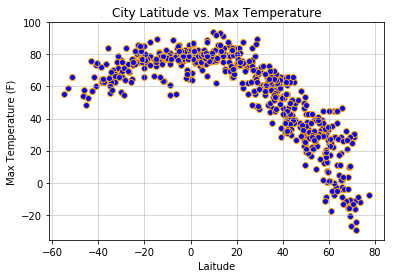

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], facecolor = "blue",edgecolor = "orange")
# format title, axis, and grid line
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../WeatherPy/Images/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

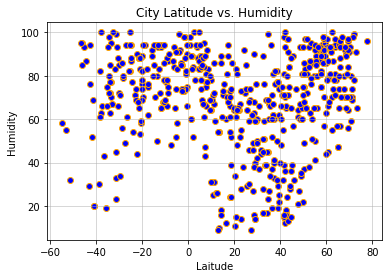

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], facecolor = "blue",edgecolor = "orange")
# format title, axis, and grid line
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../WeatherPy/Images/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

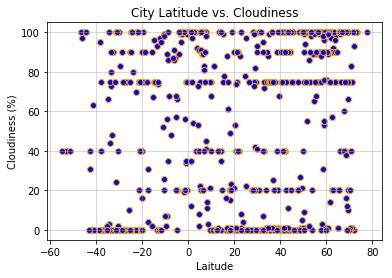

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], facecolor = "blue",edgecolor = "orange")
# format title, axis, and grid line
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../WeatherPy/Images/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

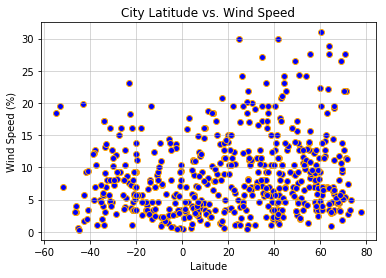

In [16]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], facecolor = "blue",edgecolor = "orange")
# format title, axis, and grid line
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../WeatherPy/Images/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [17]:
# per instructions: separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.24x + 95.86
The r-squared is: -0.8902216654372249


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


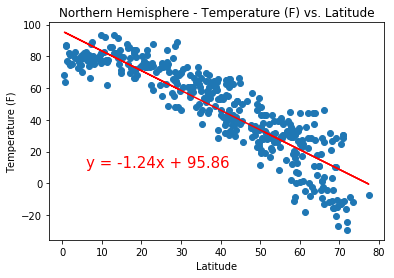

In [19]:
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("There is a negative correlation between the two series")
#print("You can conclude from the chart below that if you are in the northern hemisphere, you can expect temperature to decrease as you move further away from the equator")
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.38x + 81.18
The r-squared is: 0.5851093997363437


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


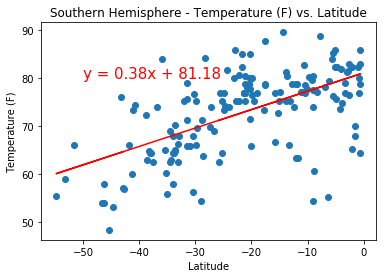

In [21]:
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("There is a positive correlation between the two series")
#print("You can conclude from the chart below that if you are in the southern hemisphere, the temeprature will increase as you get closer to the equator")
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 56.79
The r-squared is: 0.20682610030710882


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


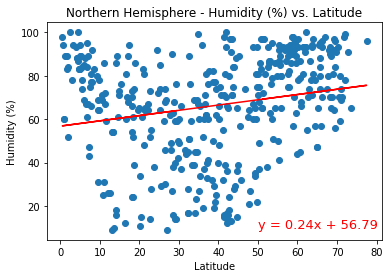

In [25]:
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(50,10),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("the regression correlation is close to '0', as a result, there is no correlation to make an analysis")
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Humidity vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.39x + 84.16
The r-squared is: 0.28942280671076676


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


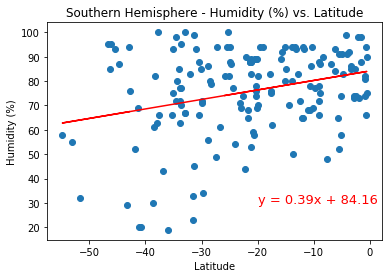

In [29]:
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-20,30),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("There is somewhat of a positive correlation between latitude and humidity for southern hemisphere.")
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Humidity vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.36x + 38.72
The r-squared is: 0.1784123063331891


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


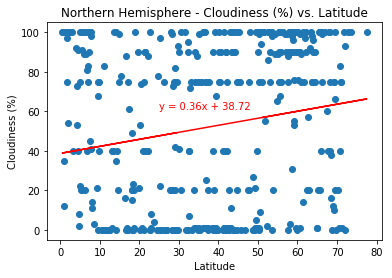

In [31]:
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(25,61),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("There is a weak positive correlation between latitude and cloudiness for northern hemisphere.")
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Cloudiness vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.62x + 65.79
The r-squared is: 0.21138736652650478


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


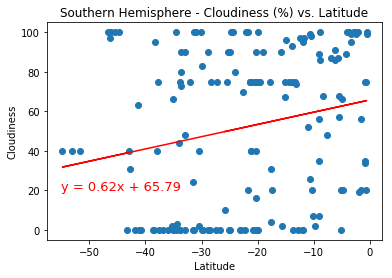

In [36]:
southern_hemisphere
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-55,20),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("there is a slight positive correlation")
#print("based on the chart below we can assume that if you are in the souther hemisphere, the closer you get to the equator expect it be more cloudy")
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Cloudiness vs. Latitude.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 7.84
The r-squared is: 0.11946301609107984


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


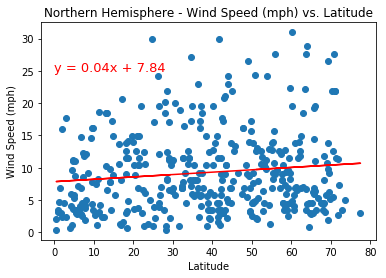

In [38]:
x_values = pd.to_numeric(northern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemisphere["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(0,25),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue}")
#print("not much, if any, correlation between wind speed and latitude in the northern hemisphere")
plt.savefig("../WeatherPy/Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 5.97
The r-squared is: -0.16558574677797727
there is a correlation of -0.4


/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/yash/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


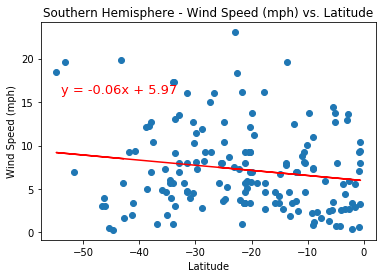

In [40]:
southern_hemisphere
x_values = pd.to_numeric(southern_hemisphere["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemisphere["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {equation}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-54,16),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue}")
print("there is a correlation of -0.4")
#print("we can assume that in the southern hemisphere, you get closer to the equator, the wind speeds tend to pick up")
plt.savefig("../WeatherPy/Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()